<a href="https://colab.research.google.com/github/AfricanLeo/Stock-Sentiment-Analysis/blob/gh-pages/Stock_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing

## Overview

Information is all around us, from published papers, to blogs to the quick tweet posted on your way to work.  For the researcher, marketer or investor, these blocks of written text provides a wealth of information that, if processed the right way, can be leveraged and put to use. 


Natural Language Processing, or NLP, is a branch of artificial intelligence that helps computers understand, interpret and manipulate human language.  It works by converting text/words into numbers and then using these numbers in a classifier / machine learning (ML) / artificial intelligence (AI)  model to make predictions.

In this project, I will use various NLP techniques to analise a dataset of stock market sentiment tweets and produce a solution to predict sentiment of investors regarding a stock.  The [stock market sentiment dataset](https://www.kaggle.com/yash612/stockmarket-sentiment-dataset) is kindly provided on the Kaggle website by [Yash Chaudhary](https://www.kaggle.com/yash612).  The dataset contains approximately 6,000 tweets regarding stocks, trading and economic forecasts from twitter.  Each tweet was classified as having a positive(1) or negative(0) sentiment. 

## Stock Market Sentiment

Market sentiment refers to the overall attitude of investors toward a particular security or financial market. It is the feeling or tone of a market, or its crowd psychology, as revealed through the activity and price movement of the securities traded in that market (as described by [Investopedia](https://www.investopedia.com/terms/m/marketsentiment.asp))

In so many words, rising prices indicate a positive, or bullish sentiment, while failing prices indicate a negative or bearish market sentiment. 

Understanding market sentiment can help investors make buy or sell decisions.Although there are technical indicators, like the VIX / fear index, this project attempts to determine investor sentiment by analysing tweets from stock investors on Twitter. 

## Project Approach

Researching best practices for conducting a sentiment analysis, I came across an [exceptionally comprehensive article](https://blog.insightdatascience.com/how-to-solve-90-of-nlp-problems-a-step-by-step-guide-fda605278e4e) on how to solve NLP problems in 'the real world'.  Although I did not follow all the steps, I largely used  [Emmanuel Ameisen](https://medium.com/@EmmanuelAmeisen)'s structure to plan and execute this project.   

The high level approach can be summed up as follows:



1.   Clean and prep the data
2.   Start with a quick and simple classifier
3.   Evaluate and explain it's predictions
4.   Use insights gained in step 3 to make changes to the model

So without further ado, let's start the project. 



# Setup

## Import the libraries

In [ ]:
# import key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tokenize import RegexpTokenizer
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

## Import the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_dir = '/content/drive/My Drive/PortfolioProjects/NLP_Text_Projects/stock_sentiment.csv'

In [ ]:
tweet_df = pd.read_csv(data_dir)

In [ ]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [ ]:
tweet_df.isnull().sum()

Text         0
Sentiment    0
dtype: int64

In [ ]:
tweet_df.nunique()

Text         5791
Sentiment       2
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



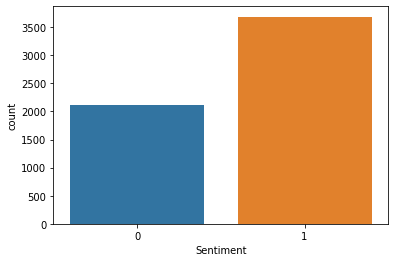

In [ ]:
sns.countplot(tweet_df['Sentiment'])

** Insights **
The dataset consists of 5, 791 tweets with either a positive or negative sentiment.  There are no missing values or doubles. 

The database is unbalanced with more positive than negative sentiment tweets. 


# Preprocess Data

At the highest level the texts/words inthe dataset needs to be converted into numbers which will then fed into a classifier/ML/AI model and said model will hopefully make sense out of the numbers.   

## Cleaning the texts

In order to analise text we need to clean it up by removing unnecessary characters that add noise to the data.  It is also good practice to remove stopwords that are common throughout text but does not necessarily add any additional meaning to the text. 

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

extended_stopwords = ['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year', 'https']

all_stopwords = stopwords.words('english')
all_stopwords.extend(extended_stopwords)
all_stopwords.remove('not')

corpus = []
for i in range(0, 5791):
  review = re.sub('[^a-zA-Z]', ' ', tweet_df['Text'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  #all_stopwords = stopwords.words('english')
  #all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(corpus[5000])

rt bysarahkrous stori verizon purchas conferenc platform bluejean cfzo k zoa


In [ ]:
tweet_df['Clean Tweets'] = corpus

Let's inspect the dataset.

In [ ]:
tweet_df

,Text,Sentiment,Clean Tweets
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,kicker watchlist xide tit soq pnk cpw bpz aj t...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,movi return fea geed indic trade awesom
2,user I'd be afraid to short AMZN - they are lo...,1,afraid short amzn look like near monopoli eboo...
3,MNTA Over 12.00,1,mnta
4,OI Over 21.37,1,oi
...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,industri bodi cii said discom like suffer net ...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,gold price slip rs investor book profit amid c...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,worker bajaj auto agre wage cut period april t...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,sharemarket live sensex high point nifti test ...


## Tokenise the Texts

Tokenisation is the process of taking a string of words and chopping it up in words, or better said 'tokens'. 

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')

tweet_df["tokens"] = tweet_df["Clean Tweets"].apply(tokenizer.tokenize)
tweet_df.head()

,Text,Sentiment,Clean Tweets,tokens
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,kicker watchlist xide tit soq pnk cpw bpz aj t...,"[kicker, watchlist, xide, tit, soq, pnk, cpw, ..."
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,movi return fea geed indic trade awesom,"[movi, return, fea, geed, indic, trade, awesom]"
2,user I'd be afraid to short AMZN - they are lo...,1,afraid short amzn look like near monopoli eboo...,"[afraid, short, amzn, look, like, near, monopo..."
3,MNTA Over 12.00,1,mnta,[mnta]
4,OI Over 21.37,1,oi,[oi]


In [ ]:
tweet_df

,Text,Sentiment,Clean Tweets,tokens
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,kicker watchlist xide tit soq pnk cpw bpz aj t...,"[kicker, watchlist, xide, tit, soq, pnk, cpw, ..."
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,movi return fea geed indic trade awesom,"[movi, return, fea, geed, indic, trade, awesom]"
2,user I'd be afraid to short AMZN - they are lo...,1,afraid short amzn look like near monopoli eboo...,"[afraid, short, amzn, look, like, near, monopo..."
3,MNTA Over 12.00,1,mnta,[mnta]
4,OI Over 21.37,1,oi,[oi]
...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,industri bodi cii said discom like suffer net ...,"[industri, bodi, cii, said, discom, like, suff..."
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,gold price slip rs investor book profit amid c...,"[gold, price, slip, rs, investor, book, profit..."
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,worker bajaj auto agre wage cut period april t...,"[worker, bajaj, auto, agre, wage, cut, period,..."
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,sharemarket live sensex high point nifti test ...,"[sharemarket, live, sensex, high, point, nifti..."


## Determine Word Count

Once the dataset is cleaned we need to determine the total number of unique words in the cleaned dataset for later processing. 

In [ ]:
tweet_df.head(2)

,Text,Sentiment,Clean Tweets,tokens
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,kicker watchlist xide tit soq pnk cpw bpz aj t...,"[kicker, watchlist, xide, tit, soq, pnk, cpw, ..."
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,movi return fea geed indic trade awesom,"[movi, return, fea, geed, indic, trade, awesom]"


In [ ]:
list_of_words = []

for tweet in tweet_df['tokens']:
  for word in tweet:
    list_of_words.append(word)


total_words = len(set(list_of_words))
total_words

7179

## Isolate X and y

Isolate cleaned up tweets into a list to use as our **X** or **input data**.  

Create **y** that contains our **dependant or output data**.  

In [ ]:
clean_tweets = tweet_df['Clean Tweets'].tolist()

In [ ]:
X = clean_tweets
y = tweet_df.iloc[:, 1].values

# Setup a list of Classifiers

Research on how to improve machine learning models almost always suggest that you simplify your model, so I will start with a simple list of classifiers.  

I will try a number of different classifiers to determine which one provides the best results.  Based on the results, I will increase the complexity and again compare the results. 

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

modelList = []
modelList.append(("LogisticReg",LogisticRegression()))
modelList.append(("GaussianNB",GaussianNB()))
modelList.append(("BernoulliNB",BernoulliNB()))
modelList.append(("DecisionTree",DecisionTreeClassifier()))
modelList.append(("RandomForest",RandomForestClassifier()))
modelList.append(("KNeighbors",KNeighborsClassifier(n_neighbors=5)))
modelList.append(("SVC",SVC()))
modelList.append(("XGB",XGBClassifier()))

def train_predict(x_train,x_test,y_train,y_test):
    for name, classifier in modelList:
        classifier.fit(x_train,y_train)
        y_pred = classifier.predict(x_test)
        print("{} Accuracy: {}".format(name,accuracy_score(y_test,y_pred)))
        print(confusion_matrix(y_test, y_pred))

# Data Representation

As mentioned before, in order for our model to understand the texts we want to feed it, it first needs to be converted to numbers. 

**Bag of Words (BoW)** is a representation of a text (sentence / document / tweet) as a list (bag) of all its words, disregarding grammar and word order but keeping count of **how many times** a word is in the input text.  

## Bag of Words (BoW)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
  count_vectorizer = CountVectorizer()
  emb = count_vectorizer.fit_transform(data)
  return emb, count_vectorizer

## Split into Train- and Test Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

In [ ]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))
print(type(X_train_counts))
print(type(X_test_counts))


<class 'list'>
<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csr.csr_matrix'>


## Visualise Using PCA

At this point, we would like to visualise the data to get some feel for how well the data is helping us solve our problem, i.e. is a tweet positive or negative.

We will use PCA to reduce the dimensions of our dataset to two so that we can visualise it. 

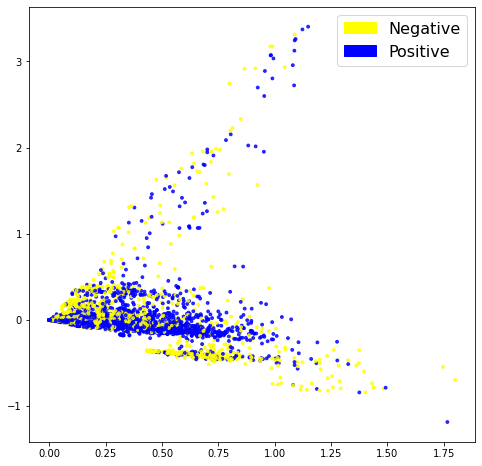

In [ ]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches


def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['yellow','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            yellow_patch = mpatches.Patch(color='yellow', label='Negative')
            blue_patch = mpatches.Patch(color='blue', label='Positive')
            plt.legend(handles=[yellow_patch, blue_patch], prop={'size': 16})


fig = plt.figure(figsize=(8, 8))          
plot_LSA(X_train_counts, y_train)
plt.show()

The first look at the data is not too bad.  Although the classes are not perfectly split, we can see at least some seperation between the two sentiments.   


## Classifiers

We will now fit the training data to each of the classifiers to see which one yields the best results. 

In [ ]:
X_train_counts = X_train_counts.toarray()
X_test_counts = X_test_counts.toarray()

In [ ]:
train_predict(X_train_counts,X_test_counts,y_train,y_test)

LogisticReg Accuracy: 0.8024158757549612
[[268 149]
 [ 80 662]]
GaussianNB Accuracy: 0.5254529767040552
[[326  91]
 [459 283]]
BernoulliNB Accuracy: 0.7506471095772217
[[200 217]
 [ 72 670]]
DecisionTree Accuracy: 0.72648835202761
[[282 135]
 [182 560]]
RandomForest Accuracy: 0.7704918032786885
[[267 150]
 [116 626]]
KNeighbors Accuracy: 0.7126833477135461
[[157 260]
 [ 73 669]]
SVC Accuracy: 0.7834339948231234
[[215 202]
 [ 49 693]]
XGB Accuracy: 0.730802415875755
[[159 258]
 [ 54 688]]


Since the Logistic Regression model gave us the best results, around 80% accuracy.  We will now see how well the model generalises on the test dataset.  

In [ ]:
clf_bow = LogisticRegression(random_state = 0)
clf_bow.fit(X_train_counts, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_bow = clf_bow.predict(X_test_counts)
print(np.concatenate((y_pred_bow.reshape(len(y_pred_bow),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]


In [ ]:
cm_bow = confusion_matrix(y_test, y_pred_bow)
print(cm_bow)
accuracy_score(y_test, y_pred_bow)

[[268 149]
 [ 80 662]]


0.8024158757549612

Evaluating the confusion matrix, we can see that the model's worst quadrant is on False-Positives.  

As this model is used to make investment decisions, it is 'safer' to have more False-Positives (13%) as opposed to False-Negatives (only 7%) as this will produce more conservative predictions.  


## Inspect the Model


Having looked at the numbers it is now also good practice to interpret the model by looking at which words the model is using to make it's predictions. 

In [ ]:
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

importance = get_most_important_features(count_vectorizer, clf_bow, 10)

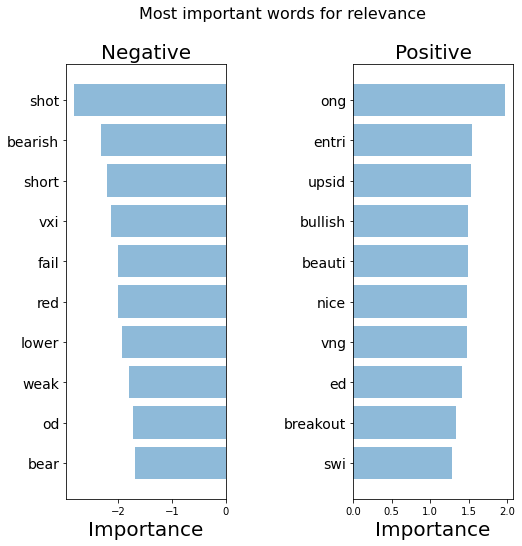

In [ ]:
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    
    fig = plt.figure(figsize=(8, 8))  

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('Negative', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('Positive', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()

top_scores = [a[0] for a in importance[0]['tops']]
top_words = [a[1] for a in importance[0]['tops']]
bottom_scores = [a[0] for a in importance[0]['bottom']]
bottom_words = [a[1] for a in importance[0]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")

Looking at the top 10 words for each category, the classifier picks up correctly the negative tweets has the words bearish, lower, weak and short. 
On the positive side, words like bullish, upsid (upside), nice and beauti increase our confidence in the classifier. 

Doing a bit of research on specific stock prices at the time that this dataset was created (early 2020), we can see that the stock price for 'red'(no 6), short for Red 5 Limited, dipped between mid-March and end of May 2020.  Oil & Natural Gas Corporation Limited, 'ong' (no 1) stock price, on the other hand, was on a recovery at about the same period, correctly reflecting the positive sentiment of investors at the time.  

Important to note at this point, however, is that with machine learning we want our model to be better at **generalising** as opposed to **memorising**.  The 'time factor' in this model will make me weary of a model that overfits on specific stock names as opposed to more general terms like bearish and bullish. 

The negative list has 7 general words and 3 stock names while the positive list has 6 general words and 4 stock names.  

We will use this measure to compare other models.

# Vocabulary Structure

A possible solution to this problem might be the use of vocabulary structure. We can use **TF-IDF** score (Term Frequency, Inverse Document Frequency) on top of our BoW's model. 

TF-IDF weighs words by how rare they are in our dataset, discounting words that are too frequent (like a stock price that is currently in the news) and just adds to the noise and causes the model to overfit. 

## TF-IDF

In [ ]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## Visualise Using PCA

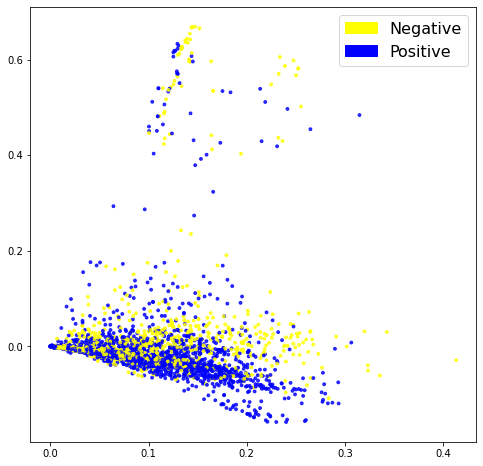

In [ ]:
fig = plt.figure(figsize=(8, 8))          
plot_LSA(X_train_tfidf, y_train)
plt.show()

In [ ]:
X_train_tfidf = X_train_tfidf.toarray()
X_test_tfidf = X_test_tfidf.toarray()

The visualisation above looks very similar in nature to the BoW model, so it does not, at first glance, look as if this approach is having a huge impact. 

## Classifier

In [ ]:
train_predict(X_train_tfidf,X_test_tfidf,y_train,y_test)

LogisticReg Accuracy: 0.7946505608283002
[[234 183]
 [ 55 687]]
GaussianNB Accuracy: 0.5263157894736842
[[318  99]
 [450 292]]
BernoulliNB Accuracy: 0.7506471095772217
[[200 217]
 [ 72 670]]
DecisionTree Accuracy: 0.7402933563416738
[[267 150]
 [151 591]]
RandomForest Accuracy: 0.7817083692838654
[[246 171]
 [ 82 660]]
KNeighbors Accuracy: 0.6773080241587576
[[ 51 366]
 [  8 734]]
SVC Accuracy: 0.7963761863675582
[[236 181]
 [ 55 687]]
XGB Accuracy: 0.7359792924935289
[[157 260]
 [ 46 696]]


In [ ]:
clf_tfidf = LogisticRegression()
clf_tfidf.fit(X_train_tfidf, y_train)

y_predicted_tfidf = clf_tfidf.predict(X_test_tfidf)

In [ ]:
print(np.concatenate((y_predicted_tfidf.reshape(len(y_predicted_tfidf),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]


In [ ]:
cm_tfidf = confusion_matrix(y_test, y_predicted_tfidf)
print('TFIDF Result:')
print(cm_tfidf)
print(accuracy_score(y_test, y_predicted_tfidf))
print('\n')
print('BoW Result:')
print(cm_bow)
accuracy_score(y_test, y_pred_bow)


TFIDF Result:
[[234 183]
 [ 55 687]]
0.7946505608283002


BoW Result:
[[268 149]
 [ 80 662]]


0.8024158757549612

Training another set of classifiers, Logistic Regression comes out on top again.  The resulting accuracy, however, is **79,5%**, half a percent less than the BoW approach.  

Inspecting the tweets that the model got wrong, the False-Negatives account for 5% of tweets while 16% are False-Positives, in other words Positive results that are incorrectly predicted as negative. 

Again these mistakes makes for a more conservative model, as too many False-Negatives (negative tweets incorrectly interpreted as positive) can potentially cause losses should investors interpret negative sentiments as positive ones.  

## Inspect the Model

In [ ]:
importance_tfidf = get_most_important_features(tfidf_vectorizer, clf_tfidf, 10)

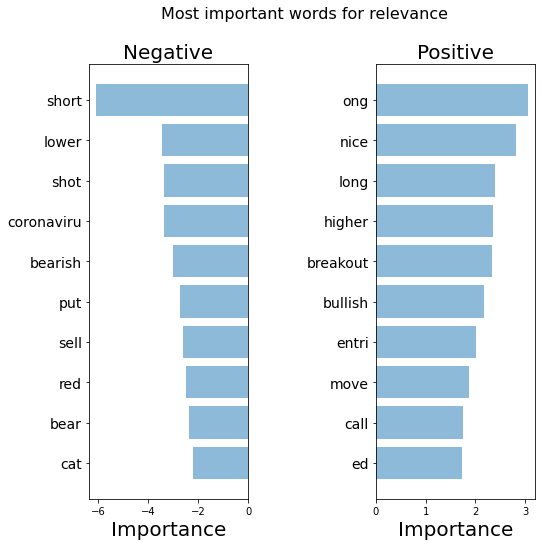

In [ ]:
top_scores = [a[0] for a in importance_tfidf[0]['tops']]
top_words = [a[1] for a in importance_tfidf[0]['tops']]
bottom_scores = [a[0] for a in importance_tfidf[0]['bottom']]
bottom_words = [a[1] for a in importance_tfidf[0]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")

Although the accuracy of the TF-IDF model is slightly lower, the top ten Negative words are already more generalised, with 8 out of 10 words not being a specific stock name.  This list also picked up 'coronaviru' which was a big negative influence in 2020. 

Looking at the positive words, only 2 are stock prices although 'ong', Oil & Natural Gas Corporation Limited, is still at the top.  The more general words like nice, long, higher and bullish have increased from 6 to 8 which should improve the generalisation of our model. 

# Semantic Meaning

Semantics refers not only to the literal meaning of a word, but rather how the meanings of words within a text relate to each other. We will use **Word2Vec** as a tool for uncovering semantics. 

Word2vec is a **continuous bag-of-words architecture**, meaning that the model predicts the current word from a window of surrounding context words, thus giving us insight into the semantics of a tweet. 

## Word2Vec

In [ ]:
!pip install gunzip

In [ ]:
import gunzip

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=0B7XkCwpI5KDYNlNUTTlSS21pQmM' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=0B7XkCwpI5KDYNlNUTTlSS21pQmM" -O GoogleNews-vectors-negative300.bin.gz && rm -rf /tmp/cookies.txt
!gunzip GoogleNews-vectors-negative300.bin.gz

--2021-05-13 16:08:07--  https://drive.google.com/uc?export=download&confirm=wX7U&id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
Resolving drive.google.com (drive.google.com)... 172.217.13.78, 2607:f8b0:4004:82f::200e
Connecting to drive.google.com (drive.google.com)|172.217.13.78|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-6o-docs.googleusercontent.com/docs/securesc/f54nn2ld6uf7vshq56bj8d9duqr6on11/jo8i6sqr8p1cpch6epvpshoff8kjl799/1620922050000/06848720943842814915/07583864582935995213Z/0B7XkCwpI5KDYNlNUTTlSS21pQmM?e=download [following]
--2021-05-13 16:08:08--  https://doc-0c-6o-docs.googleusercontent.com/docs/securesc/f54nn2ld6uf7vshq56bj8d9duqr6on11/jo8i6sqr8p1cpch6epvpshoff8kjl799/1620922050000/06848720943842814915/07583864582935995213Z/0B7XkCwpI5KDYNlNUTTlSS21pQmM?e=download
Resolving doc-0c-6o-docs.googleusercontent.com (doc-0c-6o-docs.googleusercontent.com)... 142.250.73.193, 2607:f8b0:4004:829::2001
Connecting to doc-0c-6o-docs.go

In [ ]:
import gensim
from gensim import models
from gensim.models import Word2Vec

# Load Google's pre-trained Word2Vec model.

word2vec = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [ ]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

In [ ]:
def get_word2vec_embeddings(vectors, clean_questions, generate_missing=False):
    embeddings = clean_questions['tokens'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

In [ ]:
embeddings = get_word2vec_embeddings(word2vec, tweet_df)

X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(embeddings, y, 
                                                                                        test_size=0.2, random_state=40)


In [ ]:
type(embeddings)

list

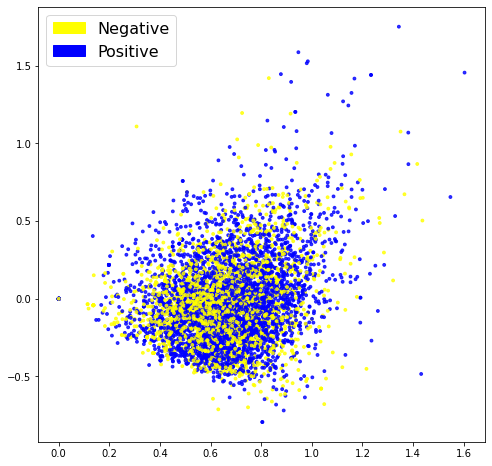

In [ ]:
fig = plt.figure(figsize=(8, 8))          
plot_LSA(embeddings, y)
plt.show()

The PCA visualisation is definitely not an improvisation on the previous two approaches.  This can be an indicator that this approach is not successfull or it can simply be a result of our dimension reduction. 

In order to see if the Word2Vec embeddings are of any use to us, we can train a classifier on them. 

In [ ]:
X_train_word2vec = np.array(X_train_word2vec)
X_test_word2vec = np.array(X_test_word2vec)

In [ ]:
print(type(X_train_word2vec))
print(type(X_test_word2vec))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## Classifier

In [ ]:
train_predict(X_train_word2vec,X_test_word2vec,y_train_word2vec,y_test_word2vec)

LogisticReg Accuracy: 0.7213114754098361
[[192 239]
 [ 84 644]]
GaussianNB Accuracy: 0.6229508196721312
[[275 156]
 [281 447]]
BernoulliNB Accuracy: 0.6453839516824849
[[212 219]
 [192 536]]
DecisionTree Accuracy: 0.6039689387402933
[[200 231]
 [228 500]]
RandomForest Accuracy: 0.6937014667817084
[[115 316]
 [ 39 689]]
KNeighbors Accuracy: 0.6980155306298533
[[225 206]
 [144 584]]
SVC Accuracy: 0.7480586712683348
[[214 217]
 [ 75 653]]
XGB Accuracy: 0.7083692838654012
[[168 263]
 [ 75 653]]


For the Word2Vec embeddings, the Support Vector Classifier comes out as the best approach.  The accuracy of the model, however, is **75%**, which is considerably lower than the previous two classifiers.  

This is probably because the model is becoming too complex for the data.  

In [ ]:
clf_w2v = SVC()
clf_w2v.fit(X_train_word2vec, y_train_word2vec)
y_predicted_word2vec = clf_w2v.predict(X_test_word2vec)

In [ ]:
type(y_predicted_word2vec)

numpy.ndarray

In [ ]:
print(np.concatenate((y_predicted_word2vec.reshape(len(y_predicted_word2vec),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 0]
 ...
 [1 1]
 [1 1]
 [1 1]]


In [ ]:
cm_w2v = confusion_matrix(y_test, y_predicted_word2vec)
print('W2V Result:')
print(cm_w2v)
print(accuracy_score(y_test, y_predicted_word2vec))
print('\n')
print('TFIDF Result:')
print(cm_tfidf)
print(accuracy_score(y_test, y_predicted_tfidf))
print('\n')
print('BoW Result:')
print(cm_bow)
accuracy_score(y_test, y_pred_bow)

W2V Result:
[[114 303]
 [175 567]]
0.5875754961173425


TFIDF Result:
[[234 183]
 [ 55 687]]
0.7946505608283002


BoW Result:
[[268 149]
 [ 80 662]]


0.8024158757549612

## BERT Pipeline

So far, our dataset has performed better on simpler models, with results declining as the complexity of models increased.  Just to confirm this, however, I will also use the Sentiment Analysis Pipeline from the BERT model. 

The BERT model generates embeddings that allow us to have multiple vector representations for the same word, based on the context in which the word is used, whereas Word2Vec only has one vector representation for each word.  



In [ ]:
!pip install transformers

Setup the sentiment analysis pipeline. 

In [ ]:

from transformers import pipeline

nlp_BERT = pipeline('sentiment-analysis')



Make a prediction on the test data

In [ ]:
y_pred_BERT = nlp_BERT(list(X_test))

In [ ]:
pred_BERT = []

for i in y_pred_BERT:
  if i['label'] == 'NEGATIVE':
    pred_BERT.append(0)
  else:
    pred_BERT.append(1)


In [ ]:
pred_BERT = np.array(pred_BERT)

Print a couple of results

In [ ]:
for i in range(3):
  print("\nOriginal Tweet :\n", tweet_df['Text'][i], 
        "\nOriginal value :\n",y_test[i], 
        "\nPredicted value :\n", pred_BERT[i], "\n\n")


Original Tweet :
 Kickers on my watchlist XIDE TIT SOQ PNK CPW BPZ AJ  trade method 1 or method 2, see prev posts 
Original value :
 1 
Predicted value :
 0 



Original Tweet :
 user: AAP MOVIE. 55% return for the FEA/GEED indicator just 15 trades for the year.  AWESOME.   
Original value :
 1 
Predicted value :
 1 



Original Tweet :
 user I'd be afraid to short AMZN - they are looking like a near-monopoly in eBooks and infrastructure-as-a-service 
Original value :
 0 
Predicted value :
 0 




In [ ]:
cm_BERT = confusion_matrix(y_test, pred_BERT)
print(cm_BERT)
accuracy_score(y_test, pred_BERT)

[[364  53]
 [570 172]]


0.4624676445211389

The accuracy of the BERT predictions decrease even further to **46%**, so for now I will abandon both the **Word2Vec** and **BERT** as possible solutions to our problem. 

# MACHINE LEARNING SOLUTIONS

Having experimented with compact sentence embeddings, it might be worth it looking at a solution that takes in whole sentences as input and so also utilising the syntactic information of our tweets.  

More complex models like Long Short Term Memory (LSTM) networks and Convolutional Neural Networks (CNN) keeps the order of words in a sentence by treating the sentence as a series of vectors.  

### Tokenise Words

Create a tokeniser object

In [ ]:
X_token = tweet_df['tokens']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_token, y, test_size=0.2, random_state=0)

In [ ]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
tokeniser = Tokenizer(num_words=total_words)

Tokenise and Pad the Data

In [ ]:
tokeniser.fit_on_texts(X_train)

train_sequences = tokeniser.texts_to_sequences(X_train)
test_sequences  = tokeniser.texts_to_sequences(X_test)

train_padded = pad_sequences(train_sequences, maxlen=25, padding='post', truncating = 'post')
test_padded  = pad_sequences(test_sequences, maxlen=25, truncating='post')

### Convert output to categorical 2D 

In [ ]:
y_train_cat = to_categorical(y_train, 2)
y_test_cat  = to_categorical(y_test, 2)

In [ ]:
y_train_cat.shape

(4632, 2)

In [ ]:
y_test_cat.shape

(1159, 2)

# LSTM Model

Long Short Term Memory networks are the classic model used to train text. Given that the results tended to indicate that a simpler model will yield better results, we will not build a very complex model. 

## Build

In [ ]:
model_LSTM = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=total_words, output_dim=16, input_length=25), 
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    tf.keras.layers.Dense(units=64, activation='relu'), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=2, activation='softmax')
])
model_LSTM.compile(optimizer='adam', loss='categorical_crossentropy', metrics='acc')

model_LSTM.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 16)            114864    
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               148480    
_________________________________________________________________
dense (Dense)                (None, 64)                16448     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 279,922
Trainable params: 279,922
Non-trainable params: 0
_________________________________________________________________


## Run LSTM

In [ ]:
model_LSTM.fit(train_padded, y_train_cat, batch_size=32, epochs=2, validation_split=0.2)

Epoch 1/2
116/116 [==============================] - 11s 53ms/step - loss: 0.6568 - acc: 0.6422 - val_loss: 0.5825 - val_acc: 0.7184
Epoch 2/2
116/116 [==============================] - 5s 45ms/step - loss: 0.4562 - acc: 0.7985 - val_loss: 0.5123 - val_acc: 0.7702


## Prediction

In [ ]:
y_predicted_LSTM = model_LSTM.predict(test_padded)

In [ ]:
predictions_LSTM = []
for i in y_predicted_LSTM:
  predictions_LSTM.append(np.argmax(i))

In [ ]:
original = []
for i in y_test_cat:
  original.append(np.argmax(i))

In [ ]:
cm_LSTM = confusion_matrix(y_test, predictions_LSTM)
print(cm_LSTM)
accuracy_score(original, predictions_LSTM)


[[  3 414]
 [  1 741]]


0.6419327006039689

The LSTM model yielded only **64%** accuracy when predicting the sentiment of a tweet in the tranining set.  This is considerably lower than the much simpler Logistic Regression model's score of **80%**.  

The model also seems to follow the same route of overfitting on the training data which can be a result of specific stock names trending at the time of capturing the data. 

# CNN Model

It might be worth exploring something a little simpler than a LSTM, which is where the Convolutional Neural Networks (CNN) makes it's entrance.  

Famous for it's ability to perform  image classification, CNN's have also proved their effectiveness in text classification. It is an easier and simpler model to train while preserving the syntactic order of words in a tweet.  

### Build

In [ ]:
model_CNN = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_words, 32, input_length=25),
    tf.keras.layers.Conv1D(24, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
model_CNN.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_CNN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 32)            229728    
_________________________________________________________________
conv1d (Conv1D)              (None, 21, 24)            3864      
_________________________________________________________________
global_max_pooling1d (Global (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                800       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 234,458
Trainable params: 234,458
Non-trainable params: 0
_________________________________________________________________


### Run

In [ ]:
model_CNN.fit(train_padded, y_train_cat, batch_size=32, epochs=3, validation_split=0.2)

Epoch 1/3
116/116 [==============================] - 2s 8ms/step - loss: 0.6631 - accuracy: 0.6297 - val_loss: 0.6165 - val_accuracy: 0.6257
Epoch 2/3
116/116 [==============================] - 1s 7ms/step - loss: 0.4944 - accuracy: 0.7405 - val_loss: 0.4767 - val_accuracy: 0.7713
Epoch 3/3
116/116 [==============================] - 1s 8ms/step - loss: 0.2017 - accuracy: 0.9339 - val_loss: 0.5373 - val_accuracy: 0.7616


### Predict

In [ ]:
y_predicted_CNN = model_CNN.predict(test_padded)

In [ ]:
predictions_CNN = []
for i in y_predicted_CNN:
  predictions_CNN.append(np.argmax(i))

In [ ]:
original = []
for i in y_test_cat:
  original.append(np.argmax(i))

In [ ]:
cm_CNN = confusion_matrix(y_test, predictions_CNN)
print(cm_CNN)
accuracy_score(original, predictions_CNN)


[[294 123]
 [198 544]]


0.723037100949094

The CNN produces a much improved accuracy score of **72%** but still considerably lower than the humble Logistic Regression model on a Bag of Words.

# Conclusion

After having performed all of these approaches on the stock sentiment dataset only to find that a simple classifier produced the best results, I was reminded of this tweet by Richard Socher that I came across in a number of articles on NLP.

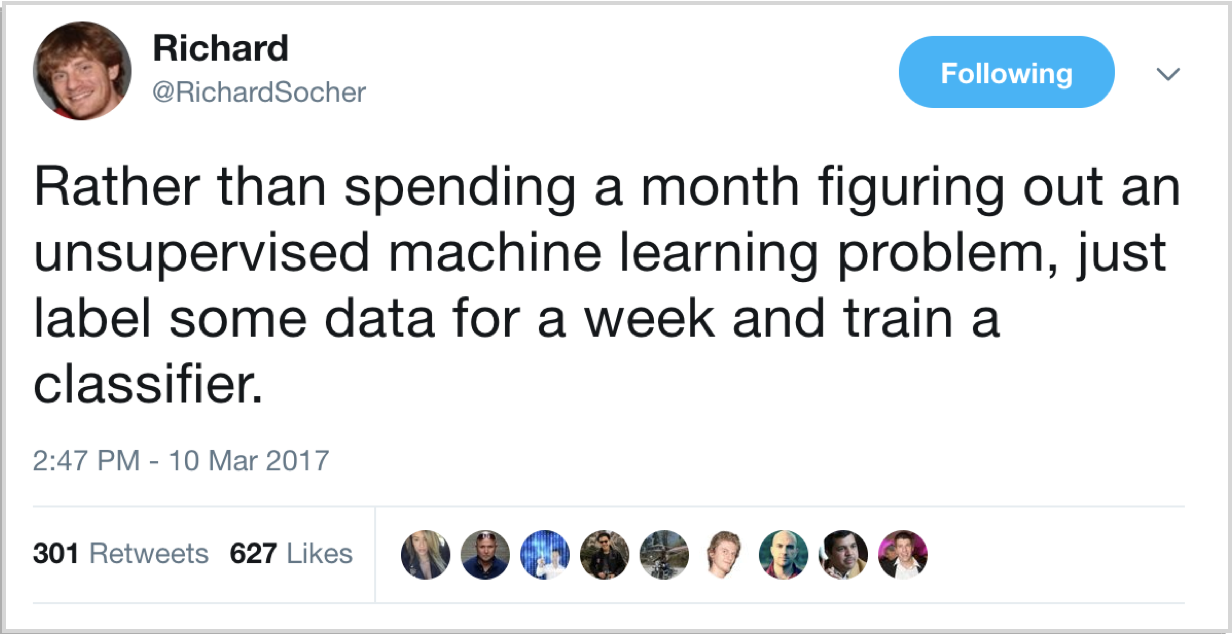

As the saying goes, (sometimes) less is more!

